### Categorical distribution의 cross entropy loss의 gradient는 sparse하다는 것을 보여주는 예.

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

gradients : tf.Tensor(
[[ 0.00361296  0.00395531  0.0046815   0.00450289  0.00321757  0.00419652
   0.00391169  0.0045875   0.00433247  0.00461766  0.00365948  0.00432619
   0.0053382   0.00459766  0.00312194  0.00251598  0.00331918  0.00311667
   0.00299613  0.0034415   0.00373775  0.00432087  0.0024994   0.00304944
   0.00424216  0.00342178  0.00450606  0.00475533  0.0051585   0.00264272
   0.0051137   0.00372213  0.00364941  0.00401781  0.00219494  0.00394459
   0.0031802   0.0020193   0.00398878  0.00335948  0.00362218  0.00435378
   0.00380838  0.00389498  0.00342636  0.00356537  0.00656977  0.00278368
   0.0028296   0.00410871  0.00403198  0.00308684  0.00445155  0.00493311
   0.00494279  0.0033437   0.00487655  0.00225906  0.00298029  0.00334889
   0.00502746  0.00412468  0.00486439  0.00359619 -0.9955478   0.00396005
   0.00242483  0.00659167  0.00414185  0.0045317   0.00195735  0.00340422
   0.00268991  0.00388417  0.00357165  0.00532131  0.00579547  0.0034082
   0.00506016  0

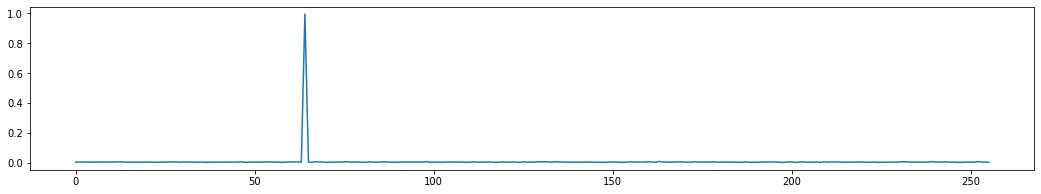

In [48]:
# Categorical Distribution의 class 갯수
classes = 256

with tf.GradientTape() as tape:
    # 임의의 랜덤 입력 생성
    inputs = tf.random.normal([1, 10])
    
    # Fully-Connected Layer를 거쳐 logit값 얻음
    logits = tf.keras.layers.Dense(classes)(inputs)
    
    # softmax를 거쳐 probability로 변환
    probs = tf.nn.softmax(logits)
    
    # True 값은 64
    trues = tf.Variable([64,], trainable=False)
    
    # true distribution과 predictive distribution간의 Cross Entropy Loss 설정
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(trues, logits)
    
# logits에 대한 loss의 gradient를 보자!
gradients = tape.gradient(loss, logits)

print('gradients :', gradients)

# d(loss)/d(logits_i) = probs_i - trues_i 공식을 통해 gradient가 맞게 구해졌는지 확인
print(probs - tf.one_hot(trues, depth=classes))

# Sparsity 확인
plt.figure(figsize=[18, 3])
plt.plot(np.abs(gradients.numpy())[0])
plt.show()